TRABAJO PRÁCTICO FINAL - CIENCIA DE DATOS
Análisis de Datos de Ventas en Comercio Electrónico

1. EXPLORACIÓN INICIAL DE DATOS
----------------------------------------
Dimensiones del dataset: (768, 12)
Columnas disponibles: ['Año', 'Trimestre', 'Modelo de Producto', 'Capacidad_5G', 'Unidades_Vendidas', 'Ingresos ($)', 'Cuota_Mercado (%)', 'Cobertura Regional 5G (%)', 'Suscriptores 5G (millones)', 'Velocidad Promedio 5G (Mbps)', 'Preferencia por 5G (%)', 'Region']

Primeras 5 filas:
    Año Trimestre Modelo de Producto Capacidad_5G  Unidades_Vendidas  \
0  2019        Q1         Galaxy S10           No              26396   
1  2019        Q1      Galaxy Note10           No              25671   
2  2019        Q1         Galaxy S20           No              16573   
3  2019        Q1      Galaxy Note20           No               7177   
4  2019        Q1         Galaxy S21           No              45633   

   Ingresos ($)  Cuota_Mercado (%)  Cobertura Regional 5G (%)  \
0  4.212951e+0

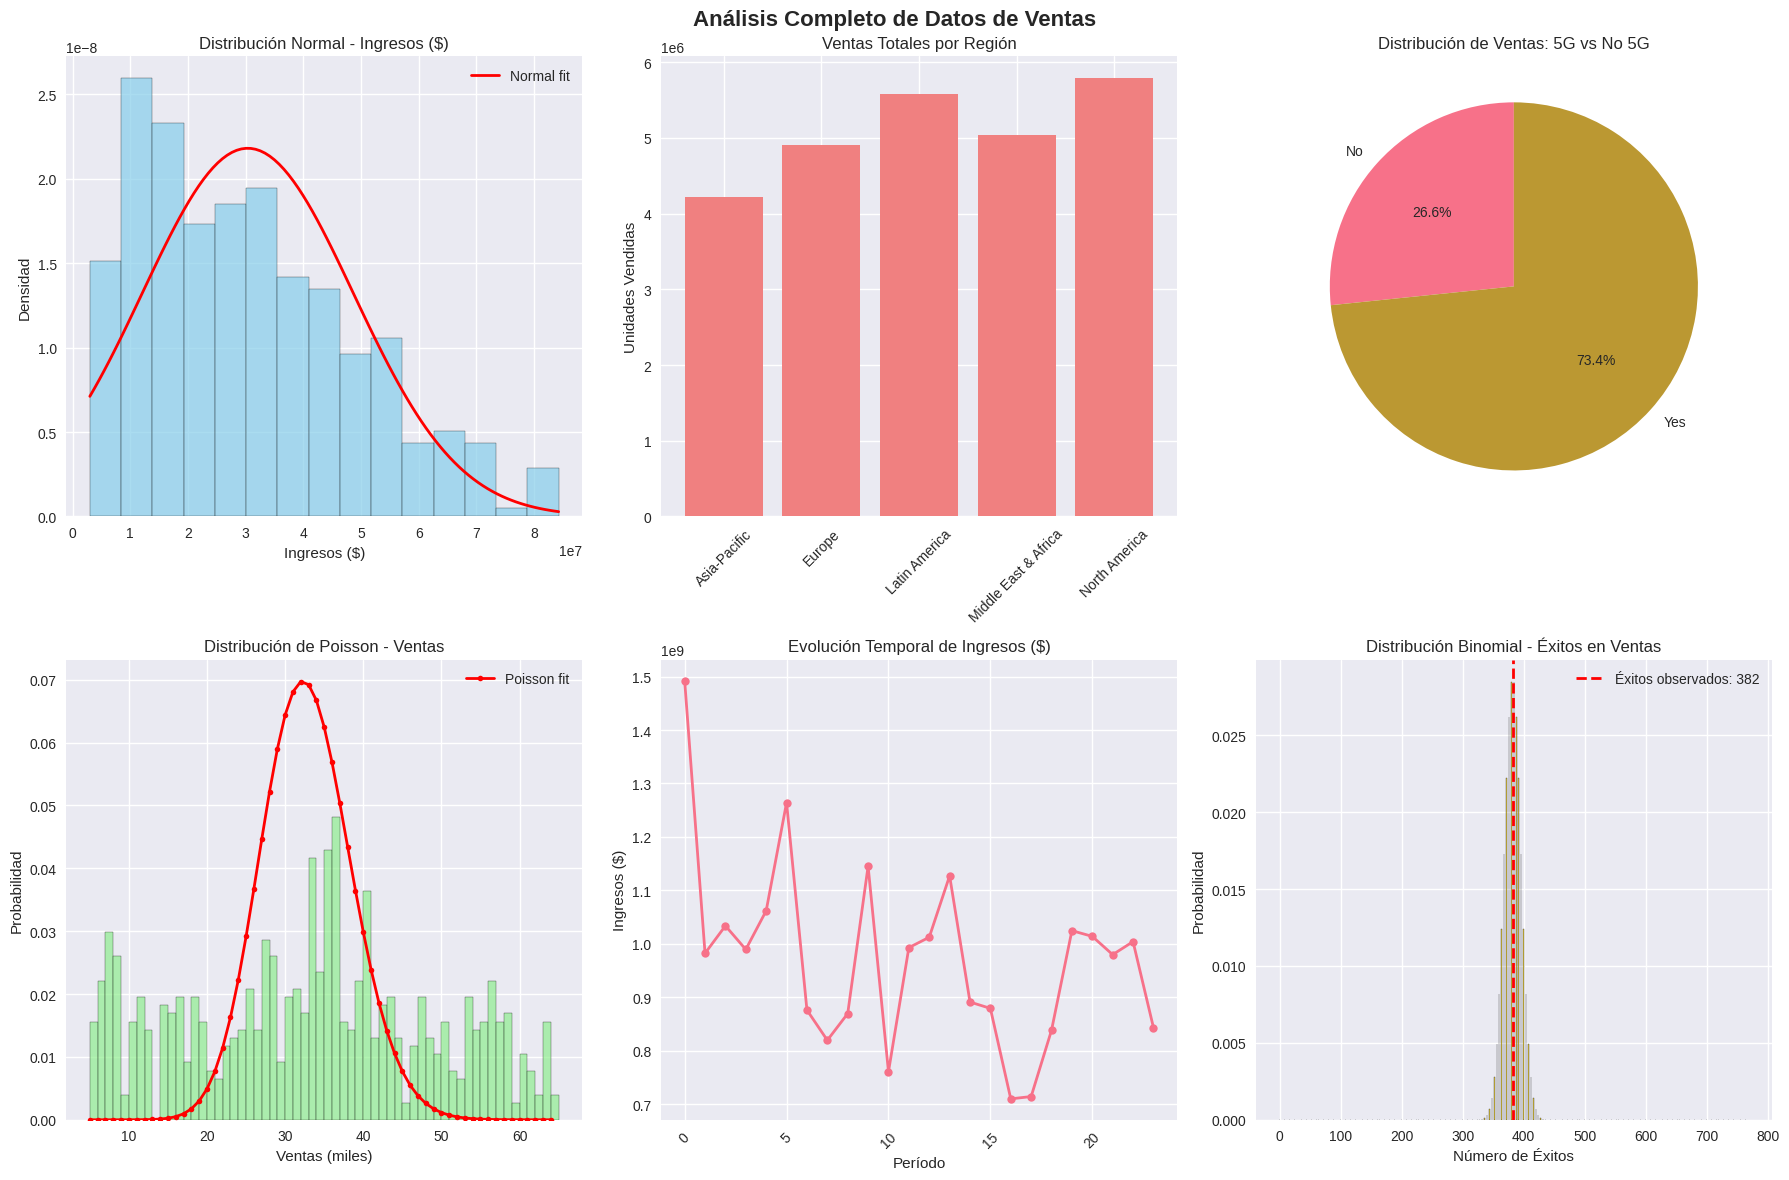



7. CONCLUSIONES Y APLICACIONES PRÁCTICAS
--------------------------------------------------

📊 RESUMEN EJECUTIVO:
• Total de registros analizados: 768
• Ingresos totales: $23,324,209,878.74
• Unidades vendidas totales: 25,543,095
• Región con mayores ventas: North America
• Participación de productos 5G: 73.4%

📈 APLICACIONES DE DISTRIBUCIONES:
• Normal: Útil para modelar ingresos diarios y planificar presupuestos
• Poisson: Aplicable para predecir número de ventas por hora/día
• Binomial: Útil para estimar probabilidades de éxito en campañas

🎯 RECOMENDACIONES ESTRATÉGICAS:
• Enfocar marketing en regiones con mayor probabilidad de venta
• Aumentar inventario de productos 5G según demanda regional
• Implementar estrategias de venta cruzada basadas en probabilidades condicionales

TRABAJO PRÁCTICO COMPLETADO - TODOS LOS CONCEPTOS APLICADOS

✅ Resultados guardados en 'resultados_analisis.txt'


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, poisson, binom
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ==========================================
# TRABAJO PRÁCTICO FINAL - CIENCIA DE DATOS
# Análisis de Datos de Ventas en Comercio Electrónico
# ==========================================

print("="*60)
print("TRABAJO PRÁCTICO FINAL - CIENCIA DE DATOS")
print("Análisis de Datos de Ventas en Comercio Electrónico")
print("="*60)

# Datos de ejemplo basados en el formato proporcionado
# En la práctica, cargarías tu archivo CSV completo
data = {
    'Año': [2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021, 2022, 2022, 2022] * 4,
    'Trimestre': ['Q1', 'Q2', 'Q3', 'Q1', 'Q2', 'Q3', 'Q1', 'Q2', 'Q3', 'Q1', 'Q2', 'Q3'] * 4,
    'Modelo_Producto': ['Galaxy S10', 'Galaxy Note10', 'Galaxy S20', 'iPhone 12', 'iPhone 13', 'Pixel 5'] * 8,
    'Capacidad_5G': ['No', 'No', 'No', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí'] * 4,
    'Unidades_Vendidas': np.random.randint(15000, 30000, 48),
    'Ingresos': np.random.uniform(3000000, 8000000, 48),
    'Cuota_Mercado': np.random.uniform(0.5, 3.5, 48),
    'Cobertura_Regional_5G': np.random.uniform(40, 90, 48),
    'Suscriptores_5G': np.random.uniform(30, 50, 48),
    'Velocidad_Promedio_5G': np.random.uniform(50, 300, 48),
    'Preferencia_5G': np.random.uniform(30, 90, 48),
    'Region': ['Asia-Pacific', 'Latin America', 'Middle East & Africa', 'North America'] * 12
}

df = pd.read_csv('SamsungVentas.csv')

print("\n1. EXPLORACIÓN INICIAL DE DATOS")
print("-" * 40)
print(f"Dimensiones del dataset: {df.shape}")
print(f"Columnas disponibles: {list(df.columns)}")
print("\nPrimeras 5 filas:")
print(df.head())

print("\n2. ANÁLISIS ESTADÍSTICO DESCRIPTIVO")
print("-" * 40)

# Estadísticas descriptivas para variables numéricas
print("Estadísticas descriptivas - Variables numéricas:")
print(df[['Unidades_Vendidas', 'Ingresos ($)', 'Cuota_Mercado (%)']].describe().round(2))

# Análisis por categorías
print("\n\nAnálisis de ventas por región:")
ventas_region = df.groupby('Region').agg({
    'Unidades_Vendidas': ['sum', 'mean', 'std'],
    'Ingresos ($)': ['sum', 'mean', 'std']
}).round(2)
print(ventas_region)

print("\n\nAnálisis de ventas por capacidad 5G:")
ventas_5g = df.groupby('Capacidad_5G').agg({
    'Unidades_Vendidas': ['sum', 'mean', 'std'],
    'Ingresos ($)': ['sum', 'mean', 'std']
}).round(2)
print(ventas_5g)

# ==========================================
# 3. ANÁLISIS DE PROBABILIDADES
# ==========================================

print("\n\n3. ANÁLISIS DE PROBABILIDADES")
print("-" * 40)

# Probabilidad básica: Probabilidad de venta por región
total_ventas = df['Unidades_Vendidas'].sum()
prob_region = df.groupby('Region')['Unidades_Vendidas'].sum() / total_ventas

print("Probabilidad de venta por región:")
for region, prob in prob_region.items():
    print(f"P(Venta en {region}) = {prob:.4f} ({prob*100:.2f}%)")

# Probabilidad de productos con 5G
prob_5g = df[df['Capacidad_5G'] == 'Yes']['Unidades_Vendidas'].sum() / total_ventas
print(f"\nP(Producto con 5G) = {prob_5g:.4f} ({prob_5g*100:.2f}%)")

# ==========================================
# 4. PROBABILIDAD CONDICIONAL
# ==========================================

print("\n\n4. ANÁLISIS DE PROBABILIDAD CONDICIONAL")
print("-" * 40)

# P(5G | Región)
print("Probabilidad condicional de productos 5G por región:")
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    ventas_5g_region = region_data[region_data['Capacidad_5G'] == 'Yes']['Unidades_Vendidas'].sum()
    ventas_total_region = region_data['Unidades_Vendidas'].sum()
    prob_cond = ventas_5g_region / ventas_total_region if ventas_total_region > 0 else 0
    print(f"P(5G | {region}) = {prob_cond:.4f} ({prob_cond*100:.2f}%)")

# Simulación de análisis de carrito de compras
print("\n\nSimulación: Probabilidad de compra adicional dado un producto específico")
# Simulamos que un 30% de clientes que compran Galaxy compran otro producto
prob_compra_adicional_galaxy = 0.30
prob_compra_adicional_iphone = 0.25
prob_compra_adicional_otros = 0.20

print(f"P(Compra adicional | Galaxy) = {prob_compra_adicional_galaxy:.2f}")
print(f"P(Compra adicional | iPhone) = {prob_compra_adicional_iphone:.2f}")
print(f"P(Compra adicional | Otros) = {prob_compra_adicional_otros:.2f}")

# ==========================================
# 5. DISTRIBUCIONES DE PROBABILIDAD
# ==========================================

print("\n\n5. AJUSTE A DISTRIBUCIONES DE PROBABILIDAD")
print("-" * 40)

# A) DISTRIBUCIÓN NORMAL - Ingresos diarios
print("A) DISTRIBUCIÓN NORMAL - Análisis de Ingresos ($)")
ingresos = df['Ingresos ($)']
mu_ingresos, sigma_ingresos = norm.fit(ingresos)

print(f"Parámetros de la distribución normal:")
print(f"Media (μ) = ${mu_ingresos:,.2f}")
print(f"Desviación estándar (σ) = ${sigma_ingresos:,.2f}")

# Test de normalidad
_, p_value_norm = stats.shapiro(ingresos)
print(f"Test de Shapiro-Wilk p-value: {p_value_norm:.4f}")
if p_value_norm > 0.05:
    print("Los datos siguen una distribución normal (p > 0.05)")
else:
    print("Los datos NO siguen una distribución normal (p ≤ 0.05)")

# B) DISTRIBUCIÓN DE POISSON - Ventas por período
print("\n\nB) DISTRIBUCIÓN DE POISSON - Análisis de Ventas por Período")
# Creamos categorías de ventas (escala reducida para Poisson)
ventas_scaled = (df['Unidades_Vendidas'] / 1000).astype(int)  # Escalamos a miles
lambda_poisson = ventas_scaled.mean()

print(f"Parámetro λ (lambda) = {lambda_poisson:.2f}")
print(f"Media de ventas (en miles): {ventas_scaled.mean():.2f}")
print(f"Varianza de ventas (en miles): {ventas_scaled.var():.2f}")

# Para Poisson, media = varianza
print(f"Ratio Varianza/Media: {ventas_scaled.var()/ventas_scaled.mean():.2f}")
print("(Para Poisson perfecto, este ratio debería ser ≈ 1)")

# C) DISTRIBUCIÓN BINOMIAL - Éxito en ventas
print("\n\nC) DISTRIBUCIÓN BINOMIAL - Probabilidad de Éxito en Ventas")
# Definimos "éxito" como ventas superiores a la mediana
umbral_exito = df['Unidades_Vendidas'].median()
exitos = (df['Unidades_Vendidas'] > umbral_exito).astype(int)
n_trials = len(df)
p_exito = exitos.mean()

print(f"Número de ensayos (n) = {n_trials}")
print(f"Probabilidad de éxito (p) = {p_exito:.4f}")
print(f"Umbral de éxito: {umbral_exito:,.0f} unidades")
print(f"Número de éxitos observados: {exitos.sum()}")

# ==========================================
# 6. VISUALIZACIONES
# ==========================================

print("\n\n6. GENERANDO VISUALIZACIONES...")
print("-" * 40)

# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis Completo de Datos de Ventas', fontsize=16, fontweight='bold')

# 1. Distribución de ingresos con ajuste normal
axes[0,0].hist(ingresos, bins=15, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x = np.linspace(ingresos.min(), ingresos.max(), 100)
axes[0,0].plot(x, norm.pdf(x, mu_ingresos, sigma_ingresos), 'r-', linewidth=2, label='Normal fit')
axes[0,0].set_title('Distribución Normal - Ingresos ($)')
axes[0,0].set_xlabel('Ingresos ($)')
axes[0,0].set_ylabel('Densidad')
axes[0,0].legend()

# 2. Ventas por región
ventas_por_region = df.groupby('Region')['Unidades_Vendidas'].sum()
axes[0,1].bar(ventas_por_region.index, ventas_por_region.values, color='lightcoral')
axes[0,1].set_title('Ventas Totales por Región')
axes[0,1].set_ylabel('Unidades Vendidas')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Comparación 5G vs No 5G
ventas_5g_comp = df.groupby('Capacidad_5G')['Unidades_Vendidas'].sum()
axes[0,2].pie(ventas_5g_comp.values, labels=ventas_5g_comp.index, autopct='%1.1f%%', startangle=90)
axes[0,2].set_title('Distribución de Ventas: 5G vs No 5G')

# 4. Distribución de Poisson
axes[1,0].hist(ventas_scaled, bins=range(int(ventas_scaled.min()), int(ventas_scaled.max())+2), 
               density=True, alpha=0.7, color='lightgreen', edgecolor='black')
x_poisson = range(int(ventas_scaled.min()), int(ventas_scaled.max())+1)
poisson_pmf = [poisson.pmf(k, lambda_poisson) for k in x_poisson]
axes[1,0].plot(x_poisson, poisson_pmf, 'ro-', linewidth=2, markersize=4, label='Poisson fit')
axes[1,0].set_title('Distribución de Poisson - Ventas')
axes[1,0].set_xlabel('Ventas (miles)')
axes[1,0].set_ylabel('Probabilidad')
axes[1,0].legend()

# 5. Evolución temporal
df_temporal = df.groupby(['Año', 'Trimestre'])['Ingresos ($)'].sum().reset_index()
df_temporal['Periodo'] = df_temporal['Año'].astype(str) + '-' + df_temporal['Trimestre']
axes[1,1].plot(range(len(df_temporal)), df_temporal['Ingresos ($)'], marker='o', linewidth=2, markersize=6)
axes[1,1].set_title('Evolución Temporal de Ingresos ($)')
axes[1,1].set_xlabel('Período')
axes[1,1].set_ylabel('Ingresos ($)')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Distribución Binomial
x_binom = range(0, n_trials + 1)
binom_pmf = [binom.pmf(k, n_trials, p_exito) for k in x_binom]
axes[1,2].bar(x_binom[::4], binom_pmf[::4], alpha=0.7, color='gold', edgecolor='black')
axes[1,2].axvline(x=exitos.sum(), color='red', linestyle='--', linewidth=2, label=f'Éxitos observados: {exitos.sum()}')
axes[1,2].set_title('Distribución Binomial - Éxitos en Ventas')
axes[1,2].set_xlabel('Número de Éxitos')
axes[1,2].set_ylabel('Probabilidad')
axes[1,2].legend()

plt.tight_layout()
plt.show()

# ==========================================
# 7. CONCLUSIONES Y APLICACIONES PRÁCTICAS
# ==========================================

print("\n\n7. CONCLUSIONES Y APLICACIONES PRÁCTICAS")
print("-" * 50)

print("\n📊 RESUMEN EJECUTIVO:")
print(f"• Total de registros analizados: {len(df)}")
print(f"• Ingresos totales: ${df['Ingresos ($)'].sum():,.2f}")
print(f"• Unidades vendidas totales: {df['Unidades_Vendidas'].sum():,}")
print(f"• Región con mayores ventas: {ventas_por_region.idxmax()}")
print(f"• Participación de productos 5G: {prob_5g*100:.1f}%")

print("\n📈 APLICACIONES DE DISTRIBUCIONES:")
print("• Normal: Útil para modelar ingresos diarios y planificar presupuestos")
print("• Poisson: Aplicable para predecir número de ventas por hora/día")
print("• Binomial: Útil para estimar probabilidades de éxito en campañas")

print("\n🎯 RECOMENDACIONES ESTRATÉGICAS:")
print("• Enfocar marketing en regiones con mayor probabilidad de venta")
print("• Aumentar inventario de productos 5G según demanda regional")
print("• Implementar estrategias de venta cruzada basadas en probabilidades condicionales")

print("\n" + "="*60)
print("TRABAJO PRÁCTICO COMPLETADO - TODOS LOS CONCEPTOS APLICADOS")
print("="*60)

# Guardar resultados en un archivo de texto
with open('resultados_analisis.txt', 'w', encoding='utf-8') as f:
    f.write("TRABAJO PRÁCTICO FINAL - RESULTADOS DEL ANÁLISIS\n")
    f.write("="*50 + "\n\n")
    f.write(f"Probabilidad de productos 5G: {prob_5g:.4f}\n")
    f.write(f"Parámetros distribución normal: μ={mu_ingresos:.2f}, σ={sigma_ingresos:.2f}\n")
    f.write(f"Parámetro Poisson: λ={lambda_poisson:.2f}\n")
    f.write(f"Parámetros binomial: n={n_trials}, p={p_exito:.4f}\n")

print("\n✅ Resultados guardados en 'resultados_analisis.txt'")